# ============================
# 1. Cargar librerías necesarias
# ============================

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Aplicamos estilos para gráficos oscuros
plt.style.use('dark_background')
sns.set_style('darkgrid')



# ============================
# 2. Cargar los datos
# ============================


In [2]:
##Si vas a correr el notebook en google colab, por favor descomenta las lineas de código

from google.colab import files, drive
print("¡Hola! Vamos a cargar nuestros primeros datos. Primero, sube el archivo que quieras analizar desde tu computadora a Colab.")

## 1. Subir el archivo
uploaded = files.upload()

¡Hola! Vamos a cargar nuestros primeros datos. Primero, sube el archivo que quieras analizar desde tu computadora a Colab.


Saving student-scores.csv to student-scores.csv


In [6]:
# Asegúrate de haber subido el archivo student_scores.csv a la carpeta /data
df = pd.read_csv('student-scores.csv')

# Mostramos las primeras filas para revisar la estructura
df.head()



,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


# ============================
# 3. Crear nueva columna: Puntaje Promedio
# ============================


In [10]:
# Calculamos el promedio de calificaciones por estudiante
subject_columns = ['math_score', 'history_score', 'physics_score','chemistry_score',
                   'biology_score', 'english_score', 'geography_score']

df['Average Score'] = df[subject_columns].mean(axis=1)


# ============================
# 4. Visualización 1: Histograma de calificaciones en Matemáticas
# ============================

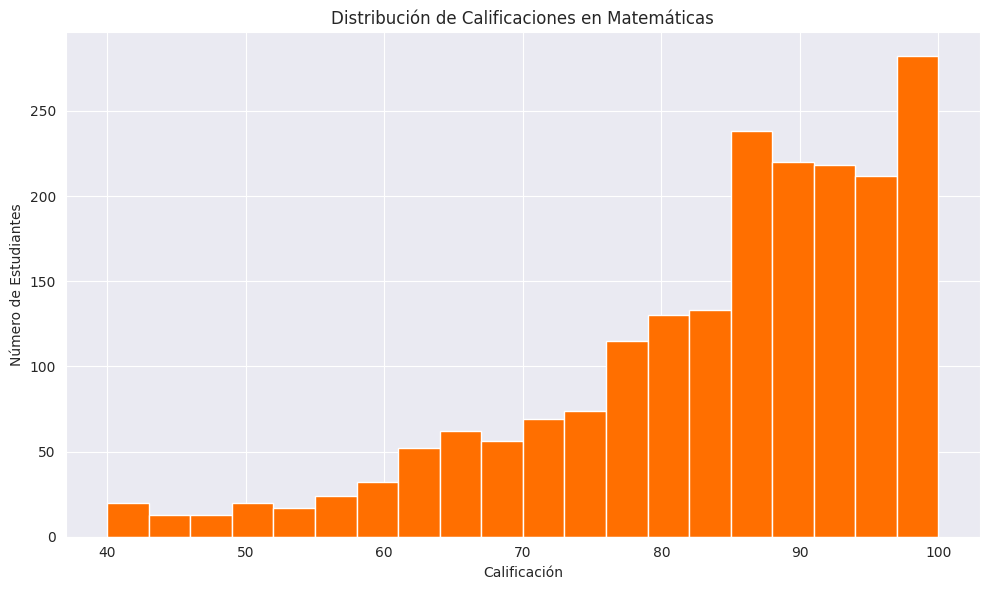

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['math_score'], bins=20, color='#ff6f00', edgecolor='white')
plt.title('Distribución de Calificaciones en Matemáticas')
plt.xlabel('Calificación')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# 5. Visualización 2: Boxplot del puntaje promedio por género
# ============================

<ipython-input-16-1499386b2e61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='Average Score', data=df, palette=['#ff6f00', '#ffa040'])


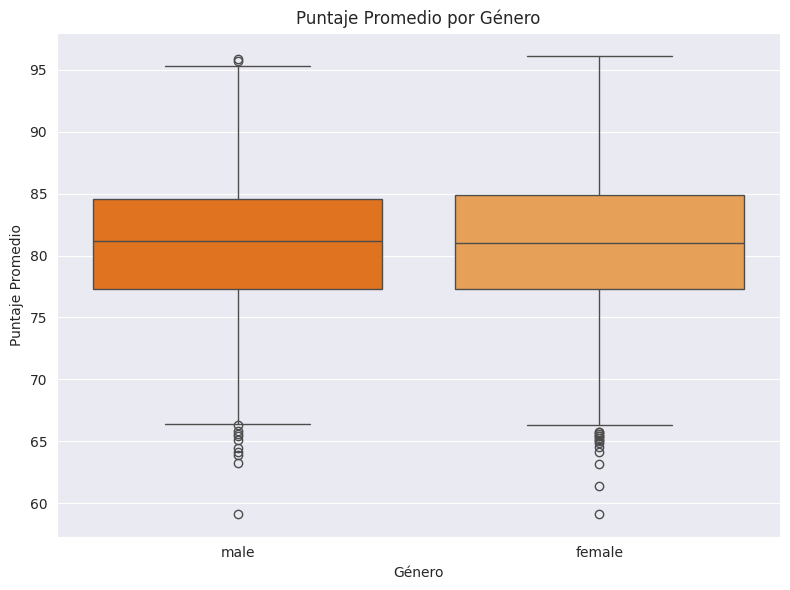

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Average Score', data=df, palette=['#ff6f00', '#ffa040'])
plt.title('Puntaje Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje Promedio')
plt.tight_layout()
plt.show()


In [15]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score',
       'Average Score'],
      dtype='object')

# ============================
# 6. Visualización 3: Dispersión entre horas de autoestudio y puntaje
# ============================


In [17]:
fig = px.scatter(
    df,
    x='weekly_self_study_hours',
    y='Average Score',
    color='gender',
    title='Relación entre Horas de Autoestudio y Puntaje Promedio',
    labels={
        'weekly_self_study_hours': 'Horas de Autoestudio por Semana',
        'Average Score': 'Puntaje Promedio'
    },
    color_discrete_sequence=['#ff6f00', '#ffa040']
)
fig.show()



# ============================
# 7. Visualización 4: Barras - Trabajo de medio tiempo vs Puntaje
# ============================

<ipython-input-19-2e9f123ac134>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




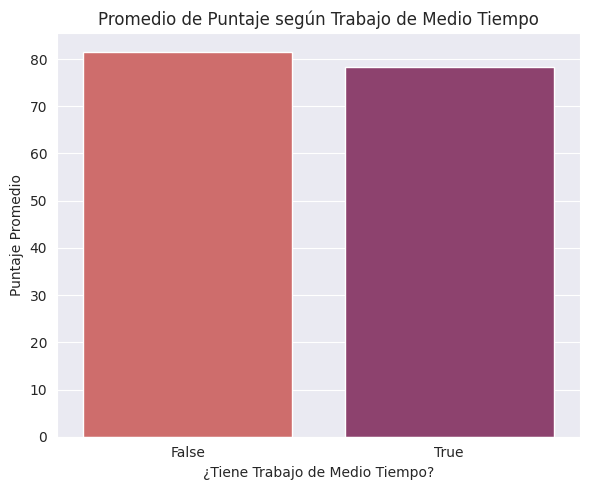

In [19]:

# Creamos resumen por condición de trabajo
job_avg = df.groupby('part_time_job')['Average Score'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='part_time_job', y='Average Score', data=job_avg, palette='flare')
plt.title('Promedio de Puntaje según Trabajo de Medio Tiempo')
plt.xlabel('¿Tiene Trabajo de Medio Tiempo?')
plt.ylabel('Puntaje Promedio')
plt.tight_layout()
plt.show()


# ============================
# 8. Visualización 5: Boxplot - Actividades extracurriculares
# ============================

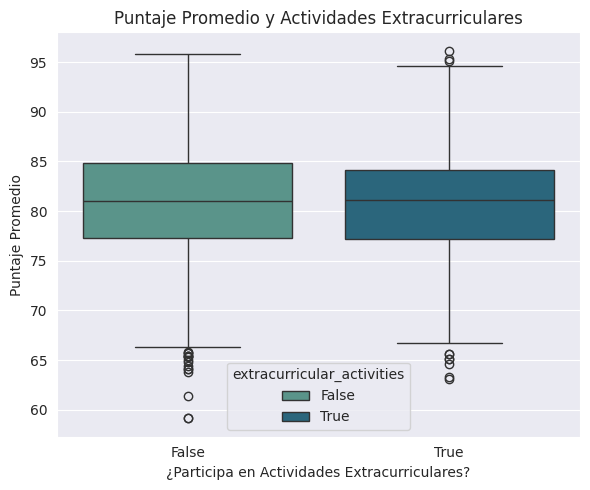

In [22]:


plt.figure(figsize=(6, 5))
sns.boxplot(x='extracurricular_activities', y='Average Score', data=df, palette='crest', hue='extracurricular_activities')
plt.title('Puntaje Promedio y Actividades Extracurriculares')
plt.xlabel('¿Participa en Actividades Extracurriculares?')
plt.ylabel('Puntaje Promedio')
plt.tight_layout()
plt.show()

# ============================
# 9. Conclusión (Markdown manual en Colab)
# ============================

- El rendimiento promedio es ligeramente mayor en estudiantes sin trabajo de medio tiempo.
- Hay una relación positiva entre horas de estudio y desempeño.
- Participar en actividades extracurriculares podría perjudica el puntaje promedio, pero la diferencia tal vez no sea significativa se endrían que realizar pruebas estadísticas.